<a href="https://colab.research.google.com/github/gmihaila/gtc2020_instructor_training/blob/master/sentiment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Sanity Check

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4 or P100.

https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=scfLT2i0MLyD

In [1]:
## VERSION CHECK [FACTORY RESET UNTIL GET AT LEAST 16280MiB GPU ]
!nvidia-smi
!nvcc -V
!python -V; pip -V

Tue Feb 11 03:33:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Installs

**Set up script installs**

1. Install most recent Miniconda release compatible with Google Colab's Python install  (3.6.7)
1. removes incompatible files
1. Install RAPIDS libraries
1. Set necessary environment variables
1. Copy RAPIDS .so files into current working directory, a workaround for conda/colab interactions
1. Recommend select v0.10
If running v0.11 or higher, updates pyarrow library to 0.15.x.

In [2]:
!pip install git+https://github.com/arvkevi/kneed
!pip install git+https://github.com/UKPLab/sentence-transformers
!pip install -U ipykernel

# Install RAPIDS
!rm rapids-colab.sh
!wget -nc https://raw.githubusercontent.com/rapidsai/notebooks-contrib/890b04ed8687da6e3a100c81f449ff6f7b559956/utils/rapids-colab.sh
!bash rapids-colab.sh

import sys, os

dist_package_index = sys.path.index("/usr/local/lib/python3.6/dist-packages")
sys.path = sys.path[:dist_package_index] + ["/usr/local/lib/python3.6/site-packages"] + sys.path[dist_package_index:]
sys.path
if os.path.exists('update_pyarrow.py'): ## This file only exists if you're using RAPIDS version 0.11 or higher
  exec(open("update_pyarrow.py").read(), globals())

!pip install -U ipykernel

  Cloning https://github.com/arvkevi/kneed to /tmp/pip-req-build-p9nzwwiw
  Running command git clone -q https://github.com/arvkevi/kneed /tmp/pip-req-build-p9nzwwiw
     |████████████████████████████████| 13.1 MB 3.3 MB/s 
     |████████████████████████████████| 7.0 MB 45.9 MB/s 
     |████████████████████████████████| 26.1 MB 13 kB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 90 kB 12.3 MB/s 
     |████████████████████████████████| 294 kB 84.8 MB/s 
  Created wheel for kneed: filename=kneed-0.5.1-py2.py3-none-any.whl size=10036 sha256=8d054861d0a04b53beb594f2b850f65d02319e804337aafa4b5785adf7571f8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-e2h_iwy_/wheels/34/1e/5b/8fccab4811880902601d6770c8af716cde606d78a033ac84fb
Successfully built kneed


  Cloning https://github.com/UKPLab/sentence-transformers to /tmp/pip-req-build-jdu8_nca
  Running command git clone -q https://github.com/UKPLab/sentence-transformers /tmp/pip-req-build-jdu8_nca
  Using cached transformers-2.3.0-py3-none-any.whl (447 kB)
     |████████████████████████████████| 59 kB 2.3 MB/s 
     |████████████████████████████████| 753.4 MB 21 kB/s 
     |████████████████████████████████| 1.5 MB 47.3 MB/s 
     |████████████████████████████████| 128 kB 59.6 MB/s 
     |████████████████████████████████| 689 kB 49.9 MB/s 
Processing /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422/sacremoses-0.0.38-cp36-none-any.whl
  Using cached sentencepiece-0.1.85-cp36-cp36m-manylinux1_x86_64.whl (1.0 MB)
     |████████████████████████████████| 69 kB 8.6 MB/s 
     |████████████████████████████████| 5.9 MB 48.0 MB/s 
     |████████████████████████████████| 81 kB 10.8 MB/s 
     |████████████████████████████████| 547 kB 59.8 MB/s 
  Created wheel fo

# Downloads

In [3]:
!wget https://github.com/gmihaila/gtc2020_instructor_training/raw/master/imdb_reviews_all_labeled.csv

--2020-02-11 03:38:31--  https://github.com/gmihaila/gtc2020_instructor_training/raw/master/imdb_reviews_all_labeled.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gmihaila/gtc2020_instructor_training/master/imdb_reviews_all_labeled.csv [following]
--2020-02-11 03:38:31--  https://raw.githubusercontent.com/gmihaila/gtc2020_instructor_training/master/imdb_reviews_all_labeled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862311 (63M) [text/plain]
Saving to: ‘imdb_reviews_all_labeled.csv.2’

imdb_reviews_all_la 100%[===================>]  62.81M  80.9MB/s    in 0.8s    

2020-02-11 03:38:33

# Imports

In [13]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import torch
## Load TF 2.0
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import numpy as np
from multiprocessing import Process, Pipe
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
import pandas as pd
from multiprocessing import Process, Pipe
from sentence_transformers import SentenceTransformer
import cudf
from cuml import NearestNeighbors, KMeans, TSNE, TruncatedSVD, UMAP
from cuml import PCA as cuPCA
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

os.environ['NUMBAPRO_NVVM']='/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so'  
os.environ['NUMBAPRO_LIBDEVICE']='/usr/local/cuda-10.0/nvvm/libdevice'

PRETRAINED_MODEL = 'bert-base-nli-stsb-mean-tokens'

TensorFlow is already loaded. Please restart the runtime to change versions.


# Functions

In [0]:
def context_embedding(text, name_of_model, batch_size=1000, use_device="cuda"):

  embed_model = SentenceTransformer(model_name_or_path=name_of_model,
                                    device=torch.device(use_device))

  encodings_text = embed_model.encode(sentences=text, 
                                          batch_size=batch_size, 
                                          show_progress_bar=True)
  # empty GPU cache
  torch.cuda.empty_cache()
  return  encodings_text


def best_kmeans_elbow(features, n_clusters, verbose=False, show=False):
  features = cudf.DataFrame.from_gpu_matrix(features)
  # features = np.array(features)
  
  clusters = list(range(2, n_clusters))
  distortions = []

  for n_clusters in clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    kmean_model = KMeans(n_clusters=n_clusters)
    kmean_model.fit(features)
    
    distortion = kmean_model.inertia_
    distortions.append(distortion)

    if verbose: print("For n_clusters =", n_clusters, "Distortion is :", distortion)

  kn = KneeLocator(clusters, distortions, curve='convex', direction='decreasing')
  best_k = int(kn.knee)

  sns.set_style("whitegrid")
  plot = sns.lineplot(clusters, 
                      distortions,
                      color="coral", 
                      label="Distortions")
  plot.set(xlabel='k', ylabel='Distortions')
  plot.set_title('Using Elbow method for best k')
  plot.axvline(x=best_k)
  if show: plt.show()
  fig = plot.get_figure()
  fig.savefig("elbow_distortions.png")
  return



def best_kmeans_silhouette(features, n_clusters):
  features = np.array(features)
  
  clusters = list(range(2, n_clusters))
  silhouettes = []

  for n_clusters in clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    kmean_model = KMeans(n_clusters=n_clusters)
    kmean_model.fit(np.array(features))

    cluster_labels = kmean_model.predict(features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouettes.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

  best_k = clusters[silhouettes.index(max(silhouettes))]

  sns.set_style("whitegrid")
  plot = sns.lineplot(clusters, 
                      silhouettes,
                      color="coral", 
                      label="Silhouette Average Score")
  plot.set(xlabel='k', ylabel='Silhouette Average Score')
  plot.set_title('Silhouette Average Score for each cluster k')
  plot.axvline(x=best_k)
  fig = plot.get_figure()
  fig.savefig("silhouette_avg.png")
  return


def kmeans(k, features):
  features = cudf.DataFrame.from_gpu_matrix(features)
  kmean_model = KMeans(n_clusters=k)
  kmean_model.fit(features)
  labels = kmean_model.labels_
  return labels



def pca_reduction(features, labels_values, n_components, random_state=20, 
                  label_decoder=None, title='PCA Plot'):
  # move to GPU matrix
  features = cudf.DataFrame.from_gpu_matrix(features)
  pca_cuml = cuPCA(n_components=n_components,
                   random_state=random_state)
  # pca_cuml.fit(features)
  # reduced_features = pca_cuml.transform(gdf_float)
  reduced_features = pca_cuml.fit_transform(features)

  # plot
  if (n_components==2) and (labels_values is not None):
    # create data frame
    reduced_features_df = pd.DataFrame()
    reduced_features_df['x'] = [float(value) for value in reduced_features.values[:,0]]
    reduced_features_df['y'] = [float(value) for value in reduced_features.values[:,1]]
    if label_decoder is not None:
      reduced_features_df['clusters'] = [label_decoder[int(value)] for value in labels_values]
    else:
      reduced_features_df['clusters'] = [int(value) for value in labels_values]
    #plot data with seaborn
    cluster_plot = sns.lmplot(data=reduced_features_df, x='x', y='y', hue='clusters', fit_reg=False, legend=True, legend_out=True)
    plt.title(title)
    plt.show()
    cluster_plot.savefig("pca_plot.png")
  return reduced_features.values


def predictions_overlap(model_predicitons, true_predicitons):
  labels = list(set(model_predicitons))
  print("Found labels: %s\n" % labels)
  ## dicitonary with predicitons counts clusters
  predictions = {label:[] for label in labels}
  for true_label, pred_label in zip(true_predicitons, model_predicitons):
    predictions[pred_label].append(true_label)
  # data frame
  matching_df = pd.DataFrame()
  matching_df['labels'] = labels
  matching_df['cluster_match'] = [" ".join([str(cluster)+":"+str(count) for cluster, count in Counter(predictions[label]).most_common()]) for label in labels]
  return matching_df

# Dataset

In [6]:
movies_sentiments_df = pd.read_csv('imdb_reviews_all_labeled.csv')

movies_reviews = movies_sentiments_df['reviews'].values
sentiments_reviews = movies_sentiments_df['sentiments'].values

print(movies_reviews[:2])
print(sentiments_reviews[:2])
print(len(sentiments_reviews))

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

# Embeddings

In [7]:
movies_reviews_embeddings = context_embedding(text=movies_reviews, name_of_model=PRETRAINED_MODEL, batch_size=500, use_device="cuda")

Batches: 100%|██████████| 100/100 [12:04<00:00, 12.93s/it]


# Best k-means

In [0]:
max_n_cluster = 10

## Elbow Method

For n_clusters = 2 Distortion is : 4172855.0
For n_clusters = 3 Distortion is : 4053102.5
For n_clusters = 4 Distortion is : 3978636.5
For n_clusters = 5 Distortion is : 3931937.5
For n_clusters = 6 Distortion is : 3888716.0
For n_clusters = 7 Distortion is : 3856695.5
For n_clusters = 8 Distortion is : 3831170.75
For n_clusters = 9 Distortion is : 3805349.0


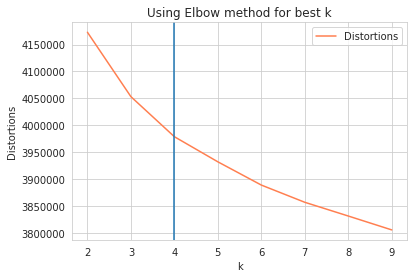

In [10]:
best_kmeans_elbow(features=movies_reviews_embeddings, n_clusters=max_n_cluster, verbose=True)

## Silhouette Method

For n_clusters = 2 The average silhouette_score is : 0.040023193
For n_clusters = 3 The average silhouette_score is : 0.034849852
For n_clusters = 4 The average silhouette_score is : 0.032421395
For n_clusters = 5 The average silhouette_score is : 0.03140508
For n_clusters = 6 The average silhouette_score is : 0.020200977
For n_clusters = 7 The average silhouette_score is : 0.019932875
For n_clusters = 8 The average silhouette_score is : 0.01796843
For n_clusters = 9 The average silhouette_score is : 0.016838279


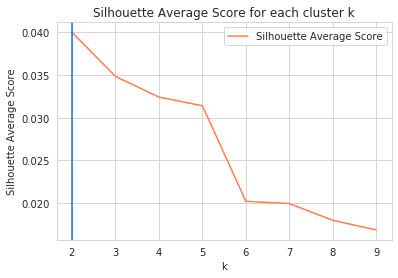

In [12]:
best_kmeans_silhouette(features=movies_reviews_embeddings, n_clusters=max_n_cluster)

## Best K model

In [0]:
best_k = 2

best_kmeans_labels = kmeans(k=best_k, features=np.array(movies_reviews_embeddings))

## PCA Visualize

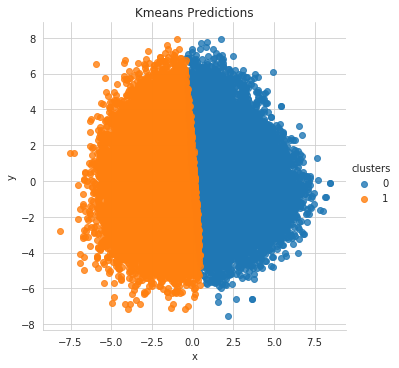

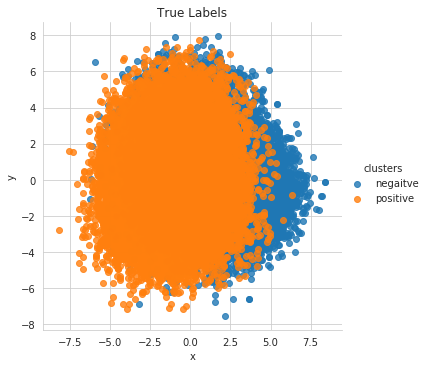



Found labels: [0, 1]



,labels,cluster_match
0,0,0:18333 1:5705
1,1,1:19295 0:6667


In [133]:
reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=best_kmeans_labels, 
                                 n_components=2, 
                                 label_decoder=None,
                                 title='Kmeans Predictions')
print('\n')
reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=sentiments_reviews, 
                                 n_components=2, 
                                 label_decoder={0:'negaitve', 1:'positive'},
                                 title='True Labels')

print('\n')
matching_df = predictions_overlap(model_predicitons=best_kmeans_labels, 
                                  true_predicitons=sentiments_reviews)
matching_df.head()

# K Means Sentiments

In [0]:
k_sentiments = 3

## Fit kmeans

In [0]:
kmeans_labels = kmeans(k=k_sentiments, features=np.array(movies_reviews_embeddings))

## Find Labels

In [139]:
matching_df = predictions_overlap(model_predicitons=kmeans_labels, 
                                  true_predicitons=sentiments_reviews)
matching_df.head()

Found labels: [0, 1, 2]



,labels,cluster_match
0,0,1:7504 0:6536
1,1,1:14195 0:3846
2,2,0:14618 1:3301


## Visualize

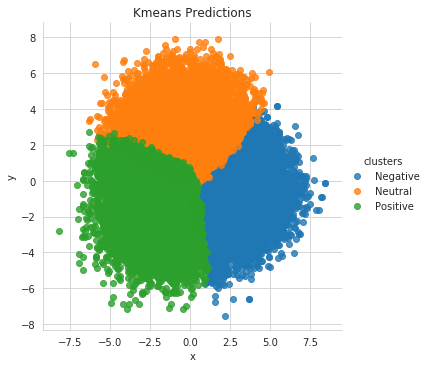

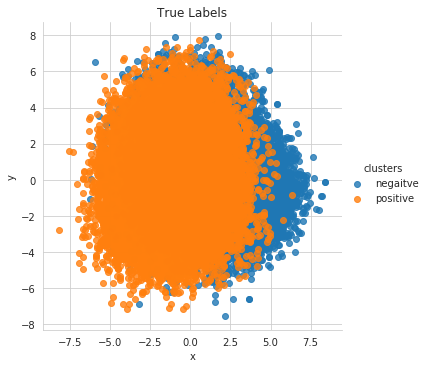

In [141]:
label_predictions_decoder = {0:'Neutral',
                             1:'Positive',
                             2:'Negative'}

reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=kmeans_labels, 
                                 n_components=2, 
                                 label_decoder=label_predictions_decoder,
                                 title='Kmeans Predictions')
print('\n')
reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=sentiments_reviews, 
                                 n_components=2, 
                                 label_decoder={0:'negaitve', 1:'positive'},
                                 title='True Labels')


## Samples

In [0]:
def show_samples()

In [145]:
for text_review, pred_sentiment, true_sentiment in zip(movies_reviews, kmeans_labels, sentiments_reviews):
  if pred_sentiment == 0:
    print(text_review)
    print('pred',pred_sentiment)
    print('true',true_sentiment)
    print('\n')

    break

Mann photographs the Alberta Rocky Mountains in a superb fashion, and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do. <br /><br />But come on Hollywood - a Mountie telling the people of Dawson City, Yukon to elect themselves a marshal (yes a marshal!) and to enforce the law themselves, then gunfighters battling it out on the streets for control of the town? <br /><br />Nothing even remotely resembling that happened on the Canadian side of the border during the Klondike gold rush. Mr. Mann and company appear to have mistaken Dawson City for Deadwood, the Canadian North for the American Wild West.<br /><br />Canadian viewers be prepared for a Reefer Madness type of enjoyable howl with this ludicrous plot, or, to shake your head in disgust.
pred 0
true 0


